In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

In [5]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=400, centers=4, cluster_std=0.60, random_state=0)

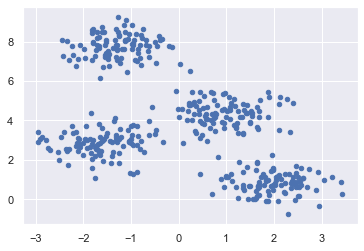

In [6]:
plt.scatter(X[:, 0], X[:, 1], s=20);
plt.show()

In [57]:
data = X.tolist()

In [58]:
data

[[0.250064460206054, 6.488267026618753],
 [-2.6979864741108663, 2.521947223495424],
 [-2.9000760372306225, 3.068772910346045],
 [0.7029505764360892, 4.314274822863424],
 [-2.5356349425185654, 2.3844994464758527],
 [-1.7029782910012499, 7.805409559070701],
 [2.223222280858821, 0.8387734261521621],
 [0.00793137001172417, 4.1761431593200085],
 [-1.7904177263031942, 3.0266853188638154],
 [1.7674740330281093, 1.2698786389440444],
 [-0.9494243319364362, 7.819744673235044],
 [2.5192193078744376, 0.1873352758219462],
 [2.3381228529390596, 3.431167922689131],
 [-2.394824832959938, 3.3980610309371393],
 [-0.7919816747057096, 2.9567959251392684],
 [3.2288149063832945, 1.1317196535506926],
 [-1.8082225260019826, 1.597017490032788],
 [1.6235048883018022, 0.4098678668054905],
 [1.2176750632530244, 3.892901272884202],
 [-1.2276898482760088, 3.5466655549139543],
 [-1.0640604440157981, 3.535545558602783],
 [-2.072161960797337, 2.663291688746382],
 [-1.9548331522357287, 7.151342235080617],
 [1.076274175

In [59]:
data = [Datum(datum) for datum in data]

In [16]:
import math
import random


class Datum:
    def __init__(self, instance):
        self.instance = instance
        label: Datum = None


def find_k_means(
    data: list[Datum], centers: list[Datum], some_large_number: int
) -> any:
    for datum in data:
        diff_min: float = some_large_number
        for center in centers:
            diff: float = math.dist(datum.instance, center.instance)
            if diff < diff_min:
                datum.label = center
                diff_min = diff

    for center in centers:
        center_data: list = []
        for datum in data:
            if datum.label == center:
                center_data.append(datum.instance)
        center.instance = [round(sum(x) / len(x), 2) for x in zip(*center_data)]

    return data, centers

In [98]:
k: int = 4
centers: list[Datum] = [
    Datum([round(random.random(), 2), round(random.random(), 2)]) for i in range(k)
]
num_of_iter: int = 50
some_large_number: float = 10

for i in range(num_of_iter):
    data, centers = find_k_means(data, centers, some_large_number)

print("\t Final centers:")

for center in centers:
    print(center.instance)

	 Final centers:
[1.96, 0.84]
[0.95, 4.37]
[-1.27, 7.76]
[-1.61, 2.85]


In [99]:
centers=np.array([center.instance for center in centers])

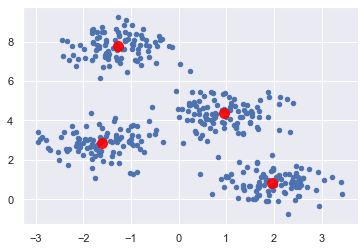

In [101]:
plt.scatter(X[:, 0], X[:, 1], s=20);
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100, alpha=0.9);
plt.show()